<a href="https://colab.research.google.com/github/Ms-Gichuhi/prediction-using-KNN-and-Naive-Bayes-classifiers/blob/main/Copy_of_KNN_classifier_titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definining the question:
You have been tasked build a model that predicts whether a passenger on the titanic survived or not.

# The metric for success:
Build a model that makes the above prediction.

Randomly partition each dataset into two parts i.e 80 - 20 sets.reapeting this twice.

perform classification of the testing set samples using the KNN Classifier. 

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Suggest and apply at least one of the optimization techniques.

Provide further recommendations to improve the classifiers.
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the datasets

train_df = pd.read_csv("train (5).csv")
test_df = pd.read_csv("test (1).csv")

In [ ]:
#previewing the first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# checking for the shape
train_df.shape

(891, 12)

In [ ]:
#checking the dtypes
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#description for our dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#preview the test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.shape

(418, 11)

Description of our variables:

survival:    Survival 

PassengerId: Unique Id of a passenger. 

pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    no. of siblings / spouses aboard the Titanic     
parch:    no. of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

# Data Cleaning

In [ ]:
# checking for Missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#we will drop a few columns that may not affect passenger survival and also drop cabin column since almost all entries are missing.

train_df.drop(['PassengerId', "Ticket", 'Cabin', 'Fare', 'Name'], axis = 1, inplace = True)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
#we now need to clean up the missing values under age and embarked
#for the Embarked we fill up with the mode for the same
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace = True)

#for the age we will fill up the missing values with the mean
train_df['Age'].fillna(train_df['Age'].mean(),inplace = True)



In [ ]:
#confirming no missing values 
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
#we will join the SibSp and Parch column since they are representing one and the same thing,whether or not one had relatives onboard the titanic
train_df['Relatives'] = train_df['SibSp'] + train_df['Parch']

#Drop the initial entries SibSp and Parch column
train_df.drop(['SibSp', 'Parch'],axis = 1)

,Survived,Pclass,Sex,Age,Embarked,Relatives
0,0,3,male,22.000000,S,1
1,1,1,female,38.000000,C,1
2,1,3,female,26.000000,S,0
3,1,1,female,35.000000,S,1
4,0,3,male,35.000000,S,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0
887,1,1,female,19.000000,S,0
888,0,3,female,29.699118,S,3
889,1,1,male,26.000000,C,0


In [ ]:
#we  need to change the sex and embarked column into numeric/binary

train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
train_df.dtypes

Survived       int64
Pclass         int64
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Embarked       int64
Relatives      int64
dtype: object

Text(0.5, 1.0, 'survivors per Pclass')

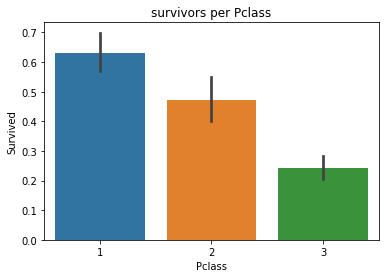

In [ ]:
#we perform a univariate analysis to see how the different variables correlate with the suvival rate of passangers.
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('survivors per Pclass')

Text(0.5, 1.0, 'survivors per Sex')

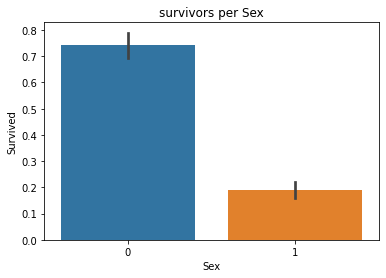

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('survivors per Sex')
#remember female= 0 ,male = 1

from the bove we can see majority of the passangers were female

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'people who survived or not')

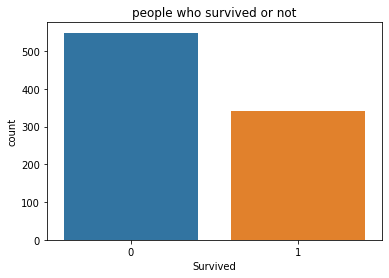

In [ ]:
sns.countplot("Survived", data = train_df)
plt.title('people who survived or not')

most people did not survive from the visualization above.

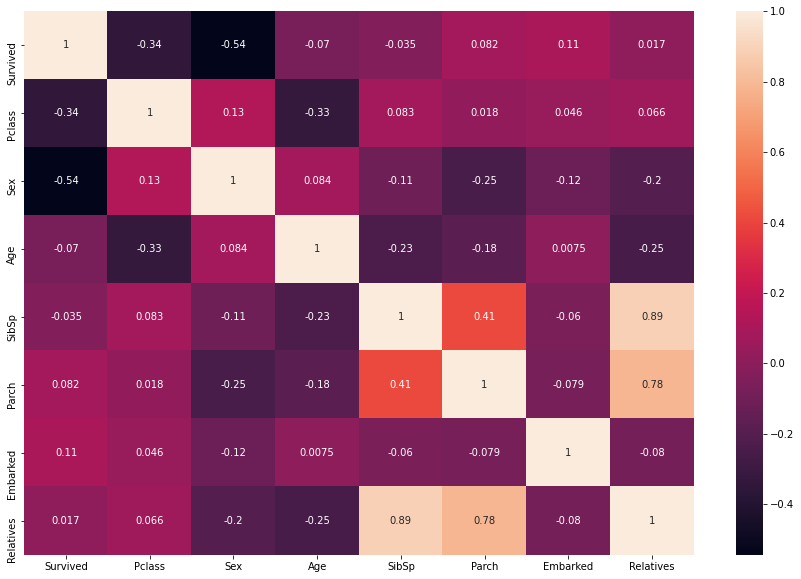

In [ ]:
#checking for correlation of numerical variables
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True)

plt.show()

# Performing KNN

In [ ]:
#defining our dependent and independent variables
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
##splitting Train and Test sets(80 - 20 set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(712, 7) (179, 7)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score

print('The accuracy score is :',accuracy_score(y_pred,y_test))

The accuracy score is : 0.7877094972067039


# KNN - (60 -40)split

In [ ]:
#defining our dependent and independent variables
x = train_df.drop(['Survived'], axis=1)
Y = train_df['Survived']

In [ ]:
##splitting Train and Test sets(60-40 set)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.4, random_state = 0)

print(x_train.shape, x_test.shape)

(534, 7) (357, 7)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data

Y_pred = classifier.predict(x_test)

In [ ]:
# Evaluating the Algorithm

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[184  37]
 [ 46  90]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       221
           1       0.71      0.66      0.68       136

    accuracy                           0.77       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.77      0.77      0.77       357



In [ ]:
# Accuracy score

print('The accuracy score is :',accuracy_score(Y_pred,Y_test))

The accuracy score is : 0.7675070028011205


# KNN - (70 - 30)split

In [ ]:
#defining our dependent and independent variables
X = train_df.drop(['Survived'], axis=1)
Y = train_df['Survived']

In [ ]:
##splitting Train and Test sets(60-40 set)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

print(X_train.shape, X_test.shape)

(623, 7) (268, 7)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data

Y_pred = classifier.predict(X_test)
# Evaluating the Algorithm

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[138  30]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       168
           1       0.69      0.68      0.69       100

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
# Accuracy score

print('The accuracy score is :',accuracy_score(Y_pred,Y_test))

The accuracy score is : 0.7686567164179104


# Performing Optimization